# ICS 438 Final Project
#### Nicholas Lee

In [277]:
# Libraries used in this project
# pip install matplotlib
# pip install numpy
# pip install pandas

# Import statements
import pandas as pd
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import mmap

## About the data
The domain of this data is within music and mental health. The data was downloaded from Kaggle (https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results). It's data from a survey asking participants about what music they listen to and their mental health. Some notable columns include the participant's age, number of hours they listen to music per day, and whether they believe music improves their mental health conditions or not. In total there are 33 columns and 736 responses.

## Main Question
I've always been interested in music and mental health has increasingly become important in society. With this data, I wanted to explore if there really is a relationship between music and mental health. It's obvious that music can change someone's mood, but overall mental health was an interesting endeavor. Discovering if there's a link or not will be the main question. This will be explored and visualized below.

In [278]:
with open('data/mxmh_survey_results.csv') as data_file:
    length = 0
    mapped_file = mmap.mmap(data_file.fileno(), length, access=mmap.ACCESS_READ)

In [279]:
# Function for getting value counts of a column in the data
def get_value_counts(col_name):
    mapped_file.seek(0)
    column_str = mapped_file.readline().decode('utf-8')
    column_list = column_str.split(',')

    raw_df = pd.DataFrame(columns=column_list)
    col_del = column_list.copy()
    col_del.remove(col_name)
    value_counts = {}
    for i, line in enumerate(iter(mapped_file.readline, b""), 1):
        line_str = line.decode('utf-8')
        row = line_str.split(',')
        raw_df.loc[i] = row
        if i % 20 == 0:
            raw_df.dropna()
            clean_df = raw_df.drop(col_del, axis=1)
            for element in clean_df[col_name]:
                if element in value_counts.keys():
                    value_counts[element] = value_counts[element] + 1
                elif element == '':
                    pass
                else:
                    value_counts[element] = 1
            raw_df.drop(raw_df.index, inplace=True)
            clean_df.drop(clean_df.index, inplace=True)

    # Taking care of residual rows
    raw_df.dropna()
    clean_df = raw_df.drop(col_del, axis=1)
    for element in clean_df[col_name]:
        if element in value_counts.keys():
            value_counts[element] = value_counts[element] + 1
        elif element == '':
            pass
        else:
            value_counts[element] = 1
    del raw_df
    del clean_df
    sorted_dict = {key:value_counts[key] for key in sorted(value_counts.keys())}
    return sorted_dict

In [280]:
# Function that builds dictionary of average values depending on parameters
def grab_averages(x_col, y_col):
    mapped_file.seek(0)
    column_str = mapped_file.readline().decode('utf-8')
    column_list = column_str.split(',')

    raw_df = pd.DataFrame(columns=column_list)
    col_del = column_list.copy()
    col_del.remove(x_col)
    col_del.remove(y_col)
    groupby_average = {}
    avg_divisor_count = {}

    for i, line in enumerate(iter(mapped_file.readline, b""), 1):
        line_str = line.decode('utf-8')
        row = line_str.split(',')
        raw_df.loc[i] = row
        if i % 20 == 0:
            raw_df.dropna()
            clean_df = raw_df.drop(col_del, axis=1)
            for k, key in enumerate(clean_df[x_col]):
                if key in groupby_average.keys():
                    groupby_average[key] = groupby_average[key] + float(clean_df[y_col].iloc[k])
                    avg_divisor_count[key] = avg_divisor_count[key] + 1
                elif key == '':
                    pass
                else:
                    groupby_average[key] = float(clean_df[y_col].iloc[k])
                    avg_divisor_count[key] = 1
            raw_df.drop(raw_df.index, inplace=True)
            clean_df.drop(clean_df.index, inplace=True)

    # Taking care of residual rows
    raw_df.dropna()
    clean_df = raw_df.drop(col_del, axis=1)
    for k, key in enumerate(clean_df[x_col]):
        if key in groupby_average.keys():
            groupby_average[key] = groupby_average[key] + float(clean_df[y_col].iloc[k])
            avg_divisor_count[key] = avg_divisor_count[key] + 1
        elif key == '':
            pass
        else:
            groupby_average[key] = float(clean_df[y_col].iloc[k])
            avg_divisor_count[key] = 1
    del raw_df
    del clean_df

    try:
        sorted_keys = sorted(np.array(list(groupby_average.keys()), dtype=np.float32))
        for i, item in enumerate(sorted_keys):
            item = str(item)
            if item.partition('.')[-1] == '0':
                sorted_keys[i] = item[:-2]
            else:
                sorted_keys[i] = item
    except:
        sorted_keys = list(groupby_average.keys())

    sorted_dict = {key:groupby_average[key] for key in sorted_keys}
    for key in sorted_dict.keys():
        sorted_dict[key] = np.round(sorted_dict[key]/avg_divisor_count[key], 2)
    return sorted_dict

In [281]:
def show_counts_bar(col_name):
    plt_dict = get_value_counts(col_name)
    keys = list(plt_dict.keys())
    num = list(plt_dict.values())

    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    ax.bar(range(len(plt_dict)), num, tick_label=keys, color='r')

    ment_heal_list = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
    if col_name in ment_heal_list:
        ax.set_xlabel(f'{col_name} level (0-10)')
    else:
        ax.set_xlabel(col_name)
    ax.set_ylabel('Count')

Let's first look at the data for some general information. I thought some interesting demographics to see were the ages, hours per day, and how many participants actually have mental health troubles. In the data, these are counted as either having anxiety, depression, insomnia, and OCD.

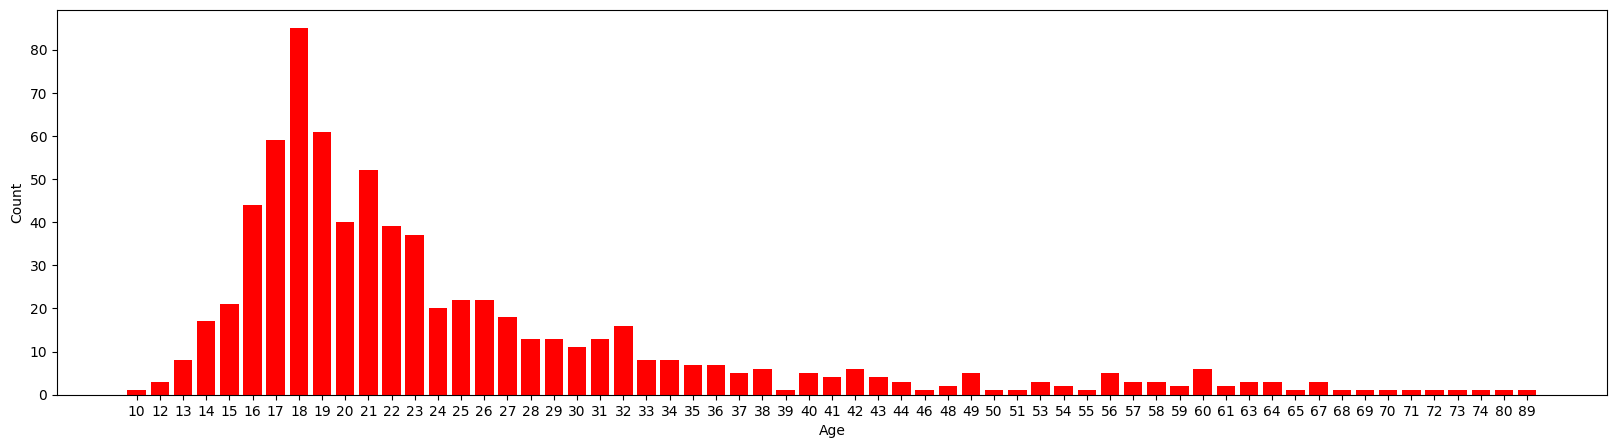

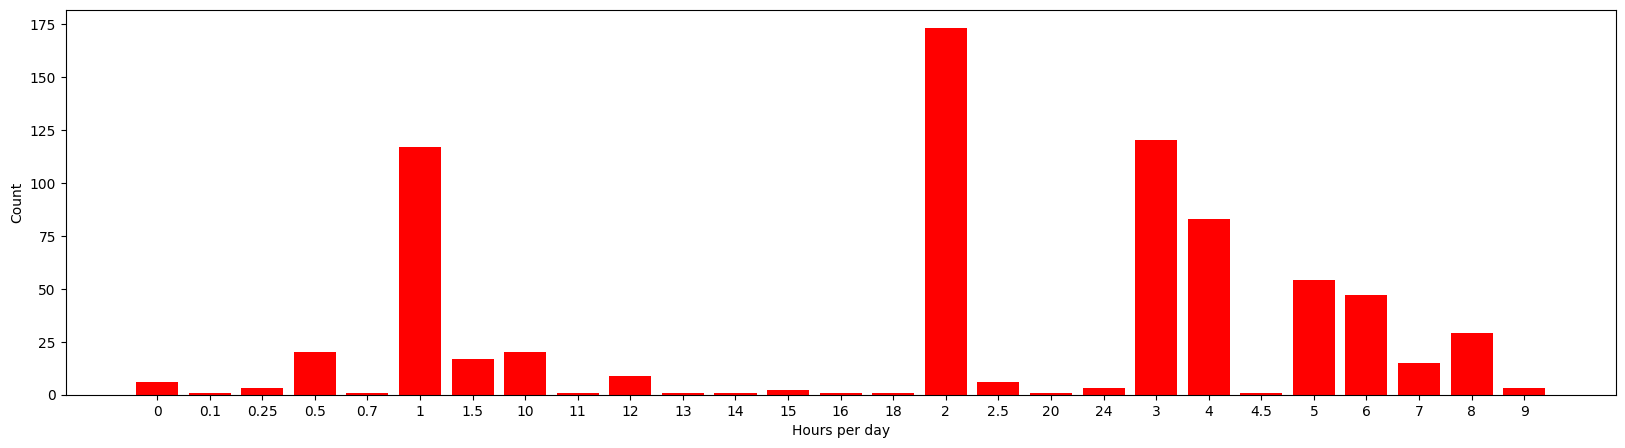

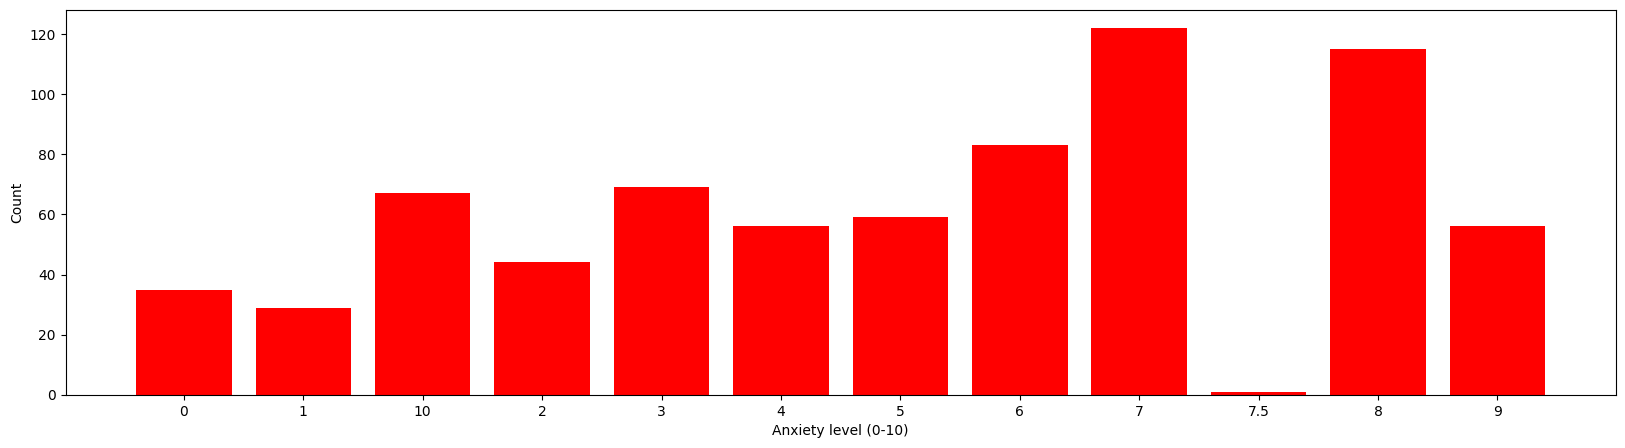

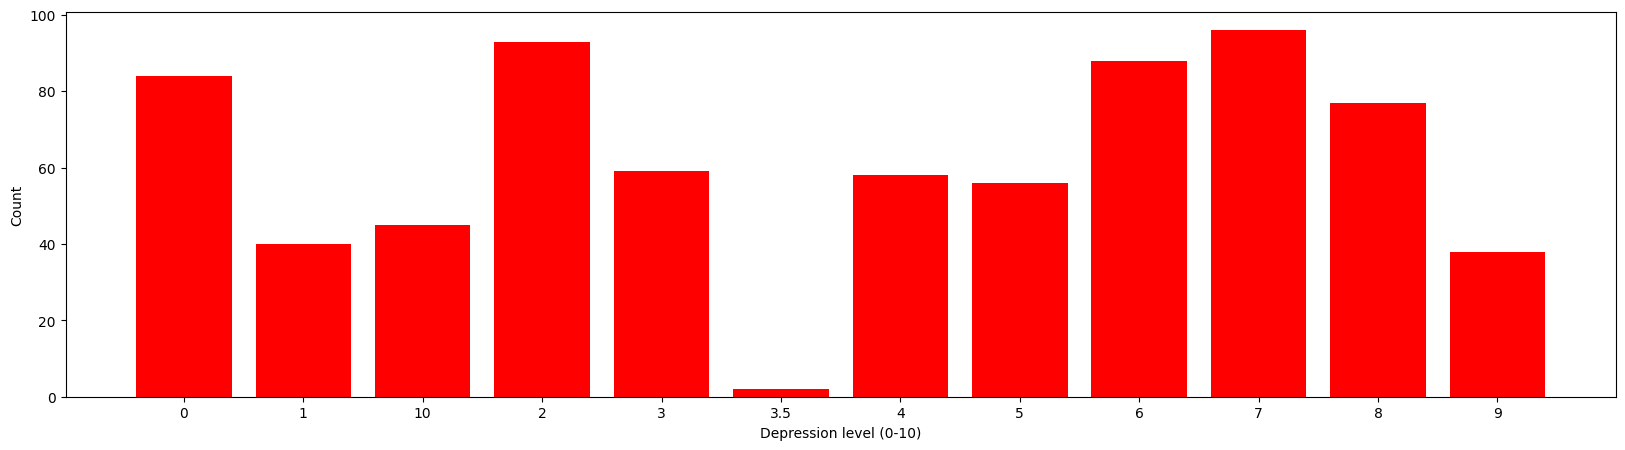

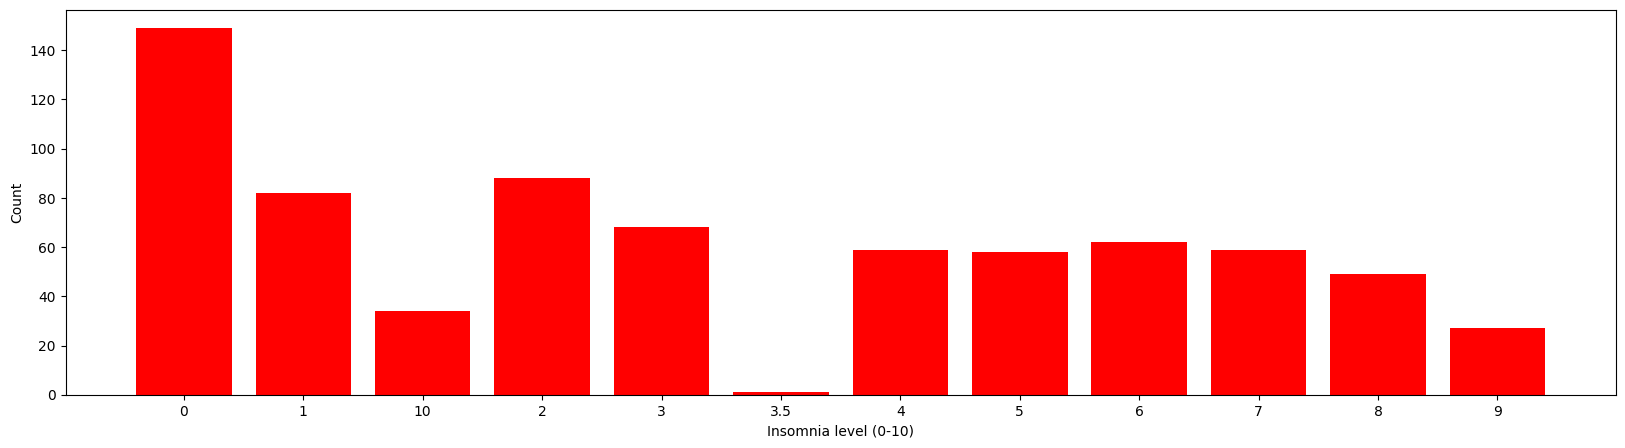

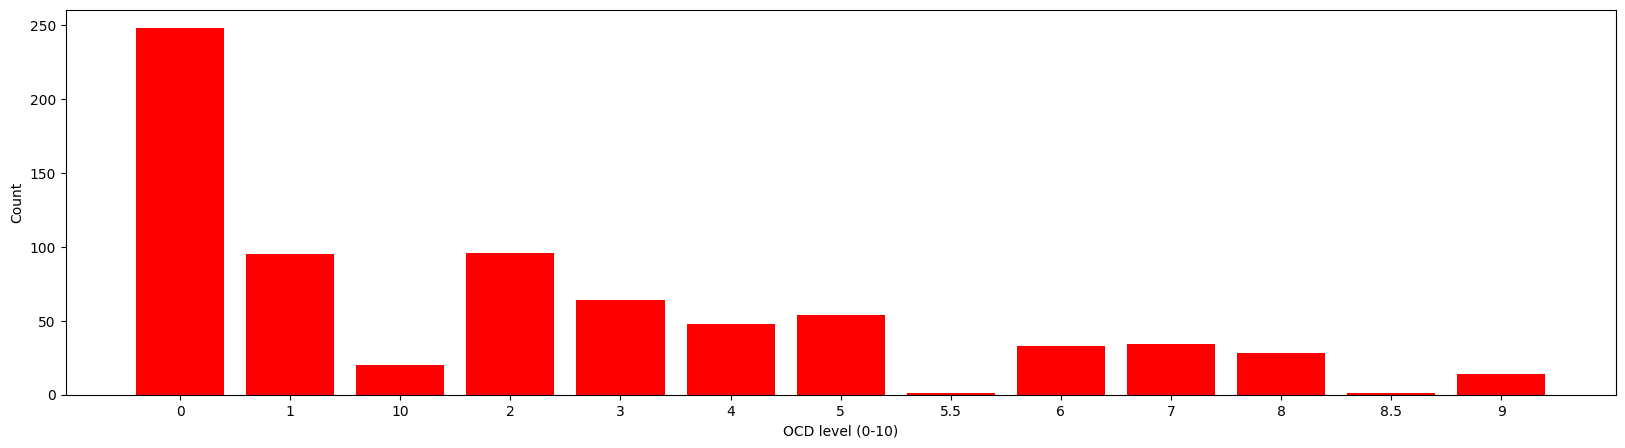

In [282]:
show_counts_bar('Age')
show_counts_bar('Hours per day')
show_counts_bar('Anxiety')
show_counts_bar('Depression')
show_counts_bar('Insomnia')
show_counts_bar('OCD')

Now with a general idea about the dataset itself, let's look into some relationships. To answer our question, here are the relationships that we'll look at
Hours per day vs Depression
Hours per day vs Anxiety
Hours per day vs Insomnia
Hours per day vs OCD


In [283]:
def show_avg_plot(x_col, y_cols):
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    for y_col in y_cols:
        input_dict = grab_averages(x_col, y_col)

        keys = input_dict.keys()
        values = input_dict.values()

        ax.plot(keys, values, label=y_col)
        ment_heal_list = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
        if y_col in ment_heal_list:
            ax.set_ylabel(f'Rating (0-10)')
        else:
            ax.set_ylabel(y_col)

    ax.set_xlabel(x_col)
    ax.set_title(f'{x_col} vs {str(y_cols)[1:-1]}')
    ax.legend()

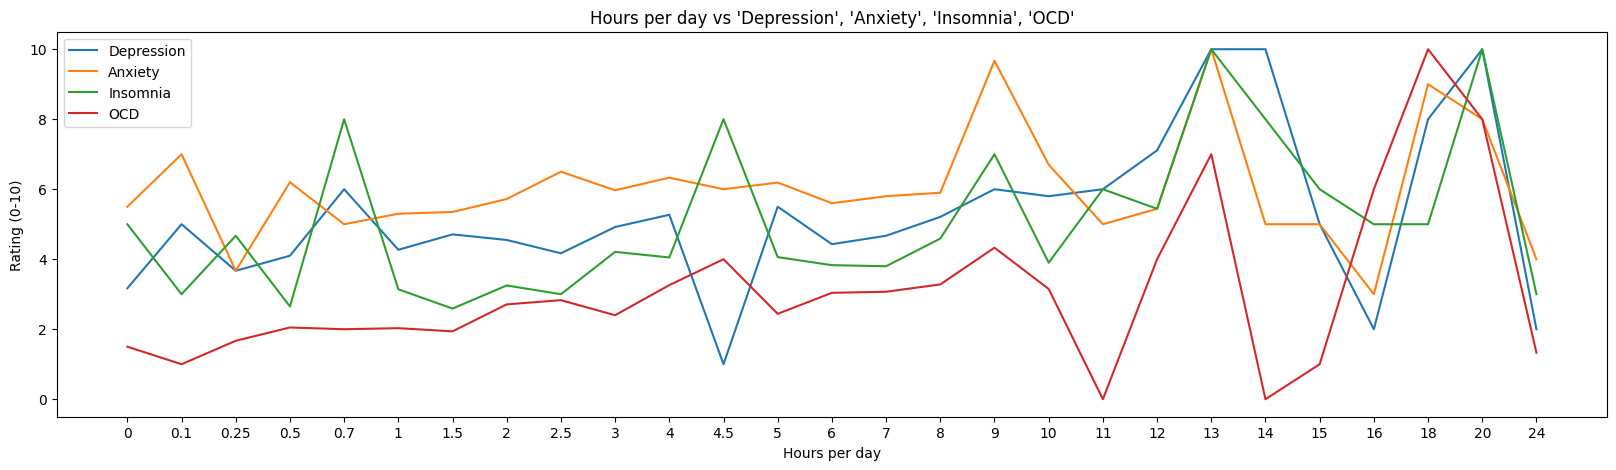

In [284]:
show_avg_plot('Hours per day', ['Depression', 'Anxiety', 'Insomnia', 'OCD'])

This is interesting, but we must consider that patients have the ability mark ratings on multiple mental illnesses. Let's then graph by a unified mental illness score which we'll find by taking the average of their scores. If we do that, we get the following

Text(0.5, 1.0, 'Hours per day vs Unified Mental Illness Rating (0-10)')

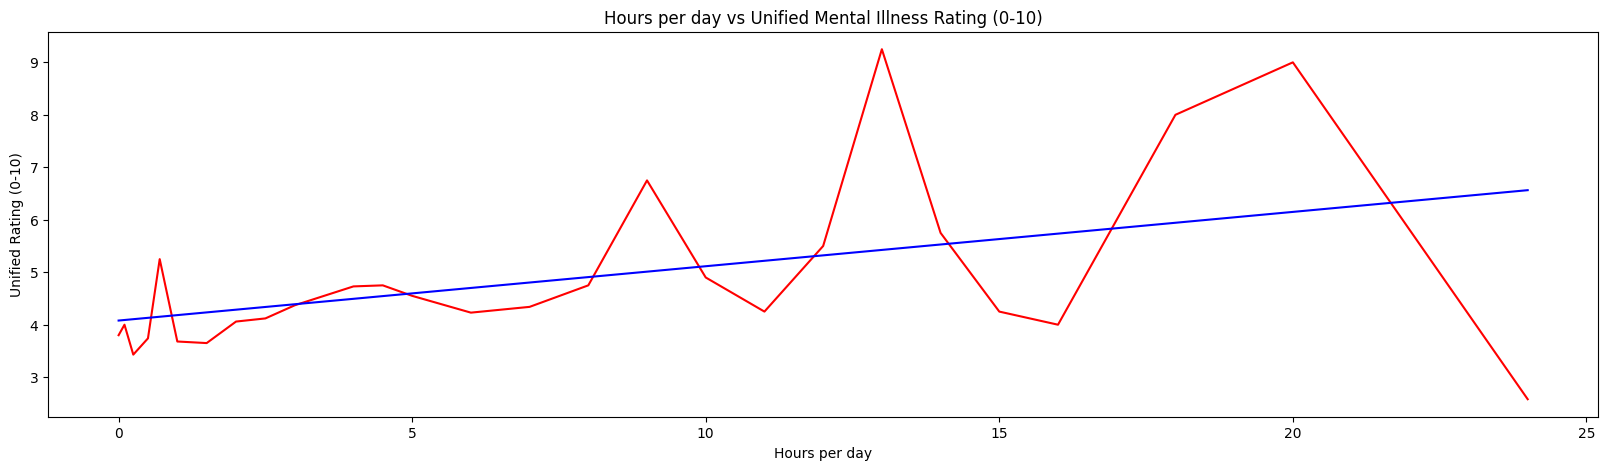

In [285]:
x_col = 'Hours per day'
y_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(5)
ment_score_dict = {}

for y_col in y_cols:
    input_dict = grab_averages(x_col, y_col)
    for key in input_dict.keys():
        if key in ment_score_dict.keys():
            ment_score_dict[key] += np.round(input_dict[key]/4, 2)
        else:
            ment_score_dict[key] = np.round(input_dict[key]/4, 2)

keys = list(ment_score_dict.keys())
values = list(ment_score_dict.values())

ax.plot([float(x) for x in keys], [float(y) for y in values], c='r')

x = np.array(keys, dtype=np.float32)
m, b = np.polyfit(x, values, 1)
ax.plot(x, m*x+b, c='b')
ax.set_ylabel(f'Unified Rating (0-10)')

ax.set_xlabel(x_col)
ax.set_title(f'{x_col} vs Unified Mental Illness Rating (0-10)')

From this graph, we can vaguely see the relationship between Hours per day and ratings of various mental illness by the regression line in blue. Generally, as the participants listen to more music per day, we see a correlated increase in mental illness severity. This is interesting because going into this study, I hypothesized that as people listen to more music, the severity of mental illness would decrease. However, the data doesn't display this relationship. My inference from this would be that instead of hours per day causing a change in the rating, it's the other way around. The more people struggle with their mental health, the more music they listen to. The reason could be that music helps boost their mood instead. Let's take a look

In [286]:
def plot_average_bar(x_col, y_col):
    input_dict = grab_averages(x_col, y_col)
    keys = list(input_dict.keys())
    num = list(input_dict.values())

    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    ax.bar(range(len(input_dict)), num, tick_label=keys, color='r')

    ment_heal_list = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
    if y_col in ment_heal_list:
        ax.set_ylabel(f'Average {y_col} level (0-10)')
    else:
        ax.set_ylabel(y_col)
    ax.set_xlabel(f'{x_col}')
    ax.set_title(f'Average {y_col} for {x_col}')

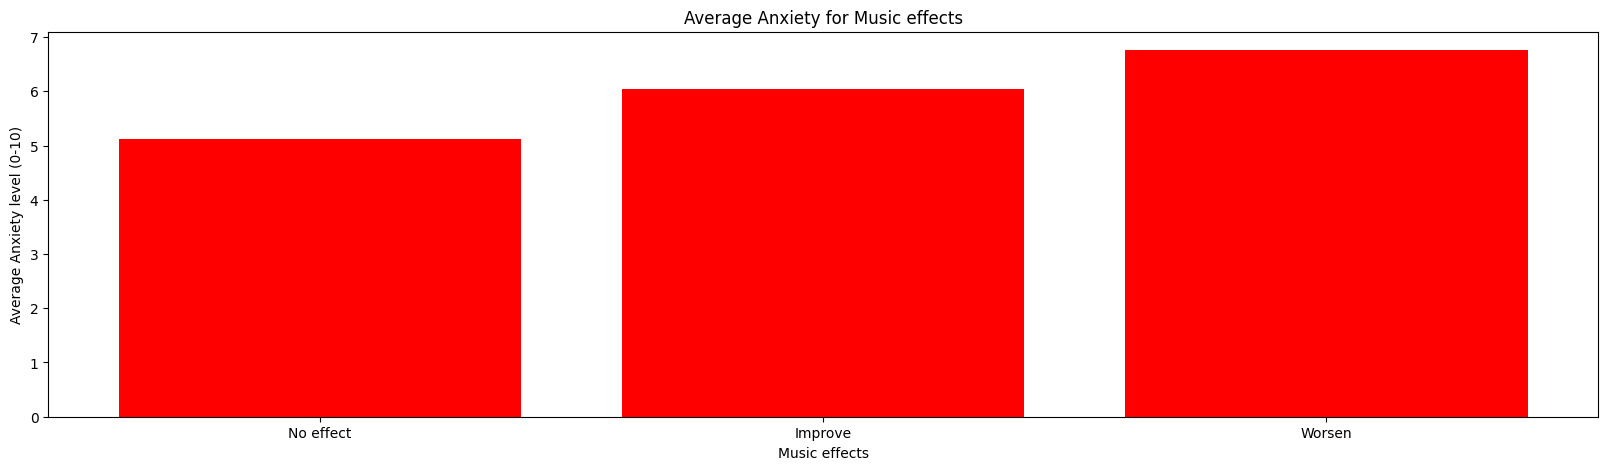

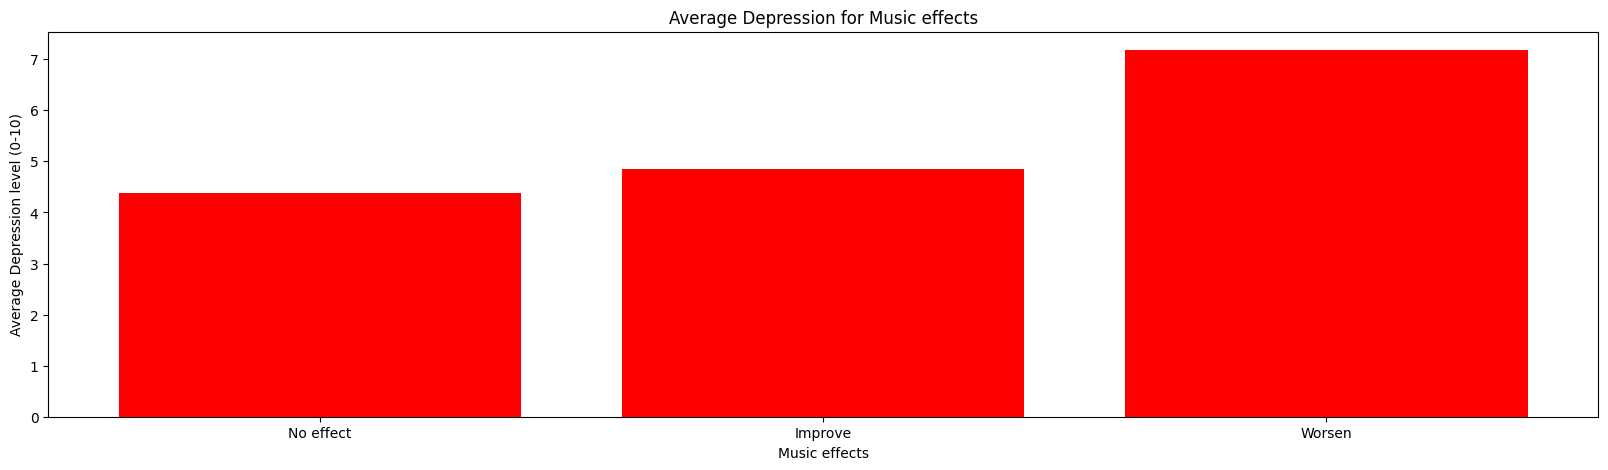

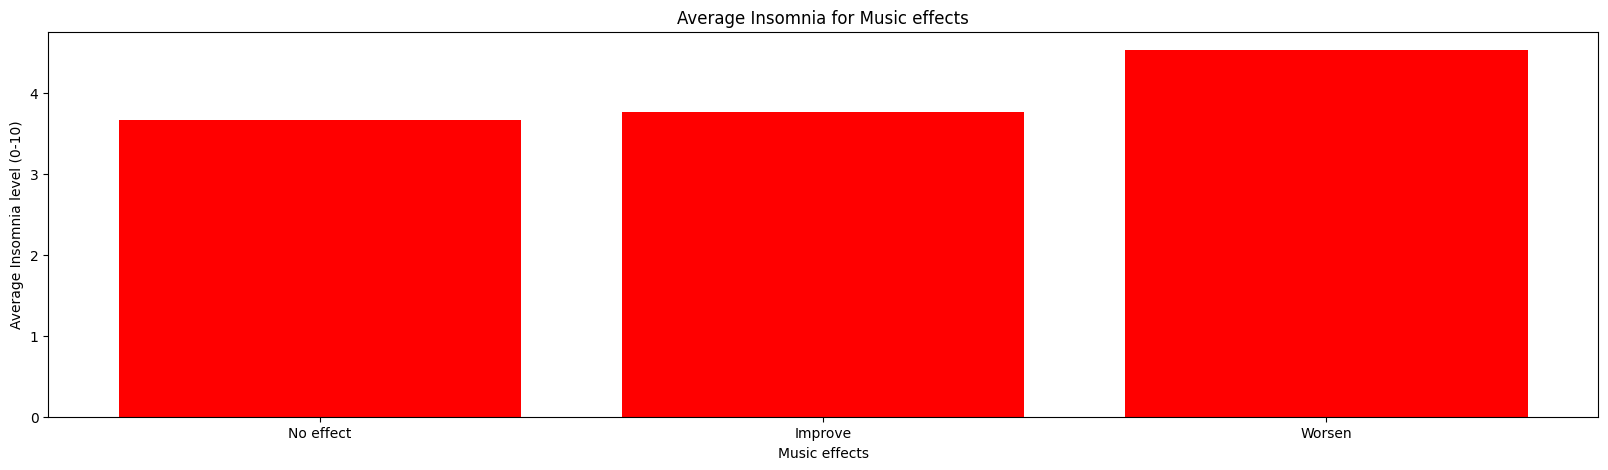

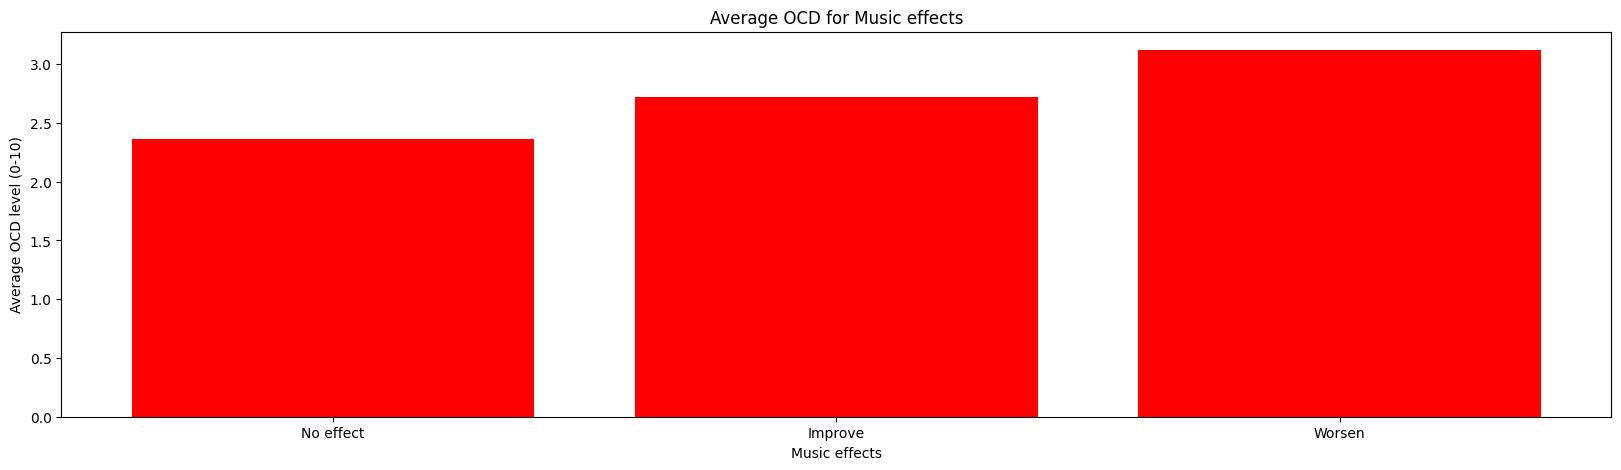

In [287]:
ment_heal_list = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
for illness in ment_heal_list:
    plot_average_bar('Music effects', illness)

This result was very surprising. Looking at each mental illness, we can see that higher ratings actually reported music as worsening their mental health conditions. One thing to note again is that although interesting, participants can mark multiple mental illnesses. Once again, let's look at a unified score.

Text(0.5, 1.0, 'Music effects vs Unified Mental Illness Rating (0-10)')

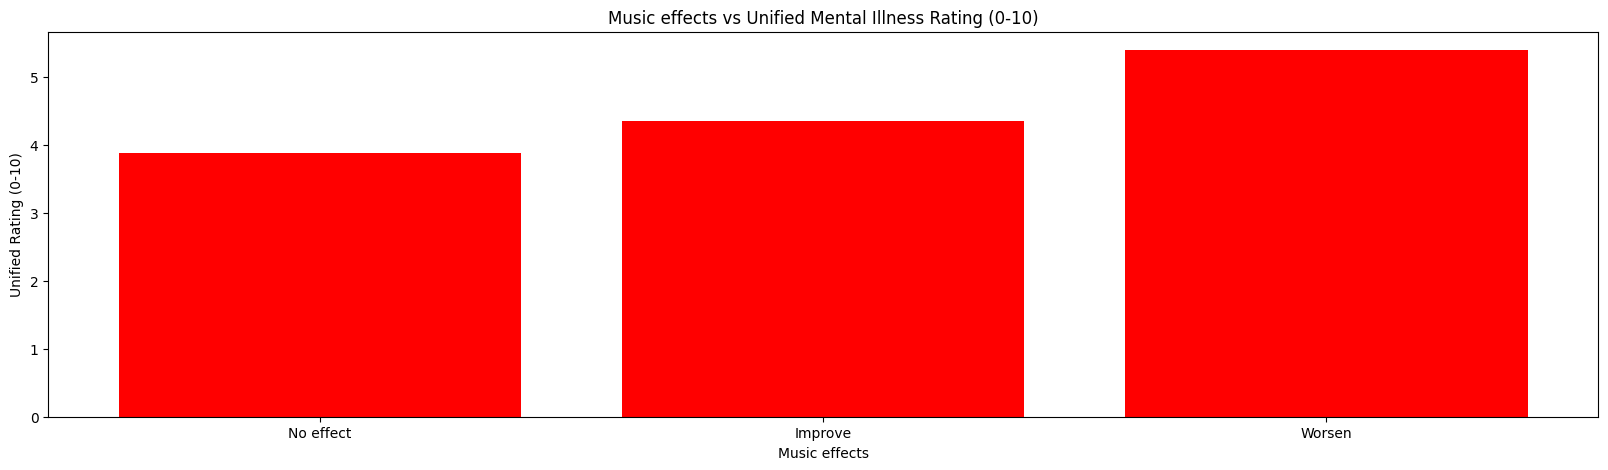

In [288]:
x_col = 'Music effects'
y_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

fig, ax = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(5)
ment_score_dict = {}

for y_col in y_cols:
    input_dict = grab_averages(x_col, y_col)
    for key in input_dict.keys():
        if key in ment_score_dict.keys():
            ment_score_dict[key] += np.round(input_dict[key]/4, 2)
        else:
            ment_score_dict[key] = np.round(input_dict[key]/4, 2)

keys = list(ment_score_dict.keys())
values = list(ment_score_dict.values())

ax.bar(range(len(input_dict)), values, tick_label=keys, color='r')
ax.set_ylabel(f'Unified Rating (0-10)')
ax.set_xlabel(x_col)
ax.set_title(f'{x_col} vs Unified Mental Illness Rating (0-10)')

This study was very interesting. I've always knew that music could help boost a person's mood, and so my hypothesis was that the more music a person listens to, their mental well-being would improve. However, we saw that the more music these participants listened to, their mental health scores were higher. A possible explanation to this was that rather than music affecting their mental health, their mental health conditions were the ones affecting how much music they listened to. And so the more severe someone's illness was, the more music they listened to. To explore why this could possibly be the case, we looked at whether people with higher scores saw improved mental health conditions from listening to music. I initially thought that the reason why people with more severe mental illness listened to more music was that it helped their condition. However, the graphs also do not support my hypothesis again. The data shows that participants with a higher average severity of mental illness reported a higher ratio of music worsening their conditions. This suggests that music may help someone's mood, but that does not necessarily mean it helps mental illness symptoms. In fact, people with more severe mental illness can actually see their symptoms intensify if they listen to music. A way I would improve this study is to see the effects of each genre of music as well as dividing each of these graphs into specific mental illnesses to see how each one is affected differently/the same.